# **Import**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Output

/content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Output


In [ ]:
# Clone YOLOv5 code
!git clone https://github.com/rkuo2000/yolov5
%cd /content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Output/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Output/yolov5


In [ ]:
!echo "train: Dataset/train/images" > data/alpr.yaml
!echo "val:   Dataset/train/images" >> data/alpr.yaml

!echo "nc : 1" >> data/alpr.yaml
!echo "names: ['license']" >> data/alpr.yaml

!cat data/alpr.yaml

train: Dataset/train/images
val:   Dataset/train/images
nc : 1
names: ['license']


In [ ]:
import os
import numpy as np
from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile

# **Prepare Dataset**

In [ ]:
IMAGE_PATH = "/content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Dataset/images"
ANNOTATIONS_PATH = "/content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Dataset/annotations"

DATA_ROOT = "Dataset/"
DEST_IMAGES_PATH = "train/images"
DEST_LABELS_PATH = "train/labels"

In [ ]:
# copy images
!mkdir -p Dataset/train
!cp -rf /content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Dataset/images Dataset/train

!mkdir -p Dataset/val/images
!cp -rf /content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Dataset/images/Cars1*.png Dataset/val/images

In [ ]:
!mkdir -p Dataset/train/labels
!mkdir -p Dataset/val/labels

# **Convert COCO Annotations to YOLOv5 Labels**

In [ ]:
def cord_converter(size, box):
    """
    convert xml annotation to darknet format coordinates
    :param size： [w,h]
    :param box: anchor box coordinates [upper-left x,uppler-left y,lower-right x, lower-right y]
    :return: converted [x,y,w,h]
    """
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    dw = np.float32(1. / int(size[0]))
    dh = np.float32(1. / int(size[1]))

    w = x2 - x1
    h = y2 - y1
    x = x1 + (w / 2)
    y = y1 + (h / 2)

    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return [x, y, w, h]

def save_file(img_jpg_file_name, size, img_box):
    classes = ['license']
    save_file_name = DATA_ROOT + DEST_LABELS_PATH + '/' + img_jpg_file_name + '.txt'
    print(save_file_name)
    file_path = open(save_file_name, "a+")
    for box in img_box:
        #cls_num = classes.index(box[0]) # find class_id
        cls_num = 0
        new_box = cord_converter(size, box[1:]) # convert box coord into YOLO x,y,w,h

        file_path.write(f"{cls_num} {new_box[0]} {new_box[1]} {new_box[2]} {new_box[3]}\n")

    file_path.flush()
    file_path.close()

def get_xml_data(file_path, img_xml_file):
    img_path = file_path + '/' + img_xml_file + '.xml'
    print(img_path)

    dom = parse(img_path)
    root = dom.documentElement
    img_name = root.getElementsByTagName("filename")[0].childNodes[0].data
    img_size = root.getElementsByTagName("size")[0]
    objects = root.getElementsByTagName("object")
    img_w = img_size.getElementsByTagName("width")[0].childNodes[0].data
    img_h = img_size.getElementsByTagName("height")[0].childNodes[0].data
    img_c = img_size.getElementsByTagName("depth")[0].childNodes[0].data
    # print("img_name:", img_name)
    # print("image_info:(w,h,c)", img_w, img_h, img_c)
    img_box = []
    for box in objects:
        cls_name = box.getElementsByTagName("name")[0].childNodes[0].data
        x1 = int(box.getElementsByTagName("xmin")[0].childNodes[0].data)
        y1 = int(box.getElementsByTagName("ymin")[0].childNodes[0].data)
        x2 = int(box.getElementsByTagName("xmax")[0].childNodes[0].data)
        y2 = int(box.getElementsByTagName("ymax")[0].childNodes[0].data)
        print("box:(c,xmin,ymin,xmax,ymax)", cls_name, x1, y1, x2, y2)
        img_jpg_file_name = img_xml_file + '.jpg'
        img_box.append([cls_name, x1, y1, x2, y2])
    # print(img_box)
    # test_dataset_box_feature(img_jpg_file_name, img_box)
    save_file(img_xml_file, [img_w, img_h], img_box)

In [ ]:
files = os.listdir(ANNOTATIONS_PATH)
for file in files:
    print("file name: ", file)
    file_xml = file.split(".")
    get_xml_data(ANNOTATIONS_PATH, file_xml[0])

file name:  Cars104.xml
/content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Dataset/annotations/Cars104.xml
box:(c,xmin,ymin,xmax,ymax) licence 195 266 244 282
Dataset/train/labels/Cars104.txt
file name:  Cars429.xml
/content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Dataset/annotations/Cars429.xml
box:(c,xmin,ymin,xmax,ymax) licence 86 166 208 195
Dataset/train/labels/Cars429.txt
file name:  Cars101.xml
/content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Dataset/annotations/Cars101.xml
box:(c,xmin,ymin,xmax,ymax) licence 167 202 240 220
Dataset/train/labels/Cars101.txt
file name:  Cars350.xml
/content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Dataset/annotations/Cars350.xml
box:(c,xmin,ymin,xmax,ymax) licence 162 179 211 188
Dataset/train/labels/Cars350.txt
file name:  Cars170.xml
/content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Dataset/annotations/Cars170.xml
box:(c,xmin,ymin,xmax,ymax) licence 318 190 346 224
Dataset/train/labels/Cars170.txt
file name:  Cars44.xm

In [ ]:
!cp -rf Dataset/train/labels/Cars1*.txt Dataset/val/labels

# **YOLOv5 Training**

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Output/yolov5

/content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Output/yolov5


In [ ]:
!python train.py --img 416 --batch 16 --epochs 300 --data data/alpr.yaml --cfg models/yolov5s.yaml

2024-02-01 03:07:53.168196: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 03:07:53.168247: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 03:07:53.169537: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-01 03:07:54.345393: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=data/alpr.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve

# **YOLOv5 Detect**

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Output

/content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Output


In [ ]:
# Download OpenALPR Benchmarks
!git clone https://github.com/openalpr/benchmarks

fatal: destination path 'benchmarks' already exists and is not an empty directory.


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Output/yolov5

/content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Output/yolov5


In [ ]:
!python detect.py --source ../benchmarks/endtoend/us --conf 0.4 --weights runs/train/exp/weights/best.pt --save-txt
!python detect.py --source ../benchmarks/endtoend/eu --conf 0.4 --weights runs/train/exp/weights/best.pt --save-txt
!python detect.py --source ../benchmarks/endtoend/br --conf 0.4 --weights runs/train/exp/weights/best.pt --save-txt
!python detect.py --source ../benchmarks/endtoend/test --conf 0.4 --weights runs/train/exp/weights/best.pt --save-txt

detect: weights=['runs/train/exp/weights/best.pt'], source=../benchmarks/endtoend/us, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-303-gb3ca8d8 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
image 1/222 /content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Output/benchmarks/endtoend/us/0b86cecf-67d1-4fc0-87c9-b36b0ee228bb.jpg: 384x640 1 license, Done. (0.084s)
image 2/222 /content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Output/benchmarks/endtoend/us/12c6cb72-3ea3-49e7-b381-e0cdfc5e8960.jpg: 384x640 Done. (0.007s)
image 3/222 /content




# **Display Detected Images**

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Output/yolov5

/content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Output/yolov5


In [ ]:
from IPython.display import Image

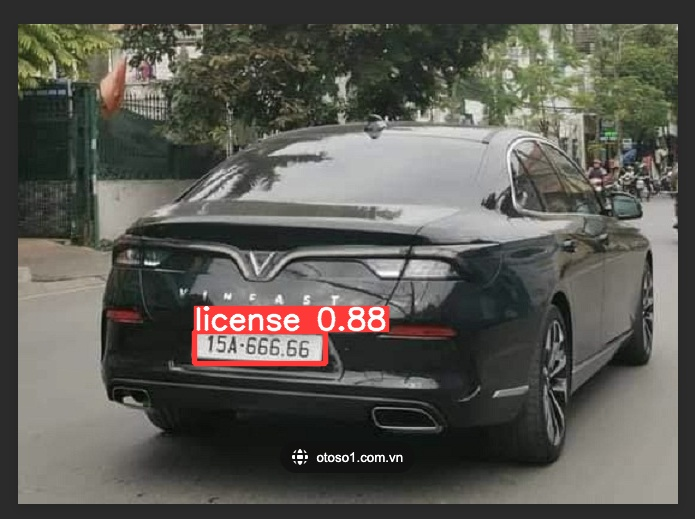

In [ ]:
Image('/content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Output/yolov5/runs/detect/exp22/test1.jpg')

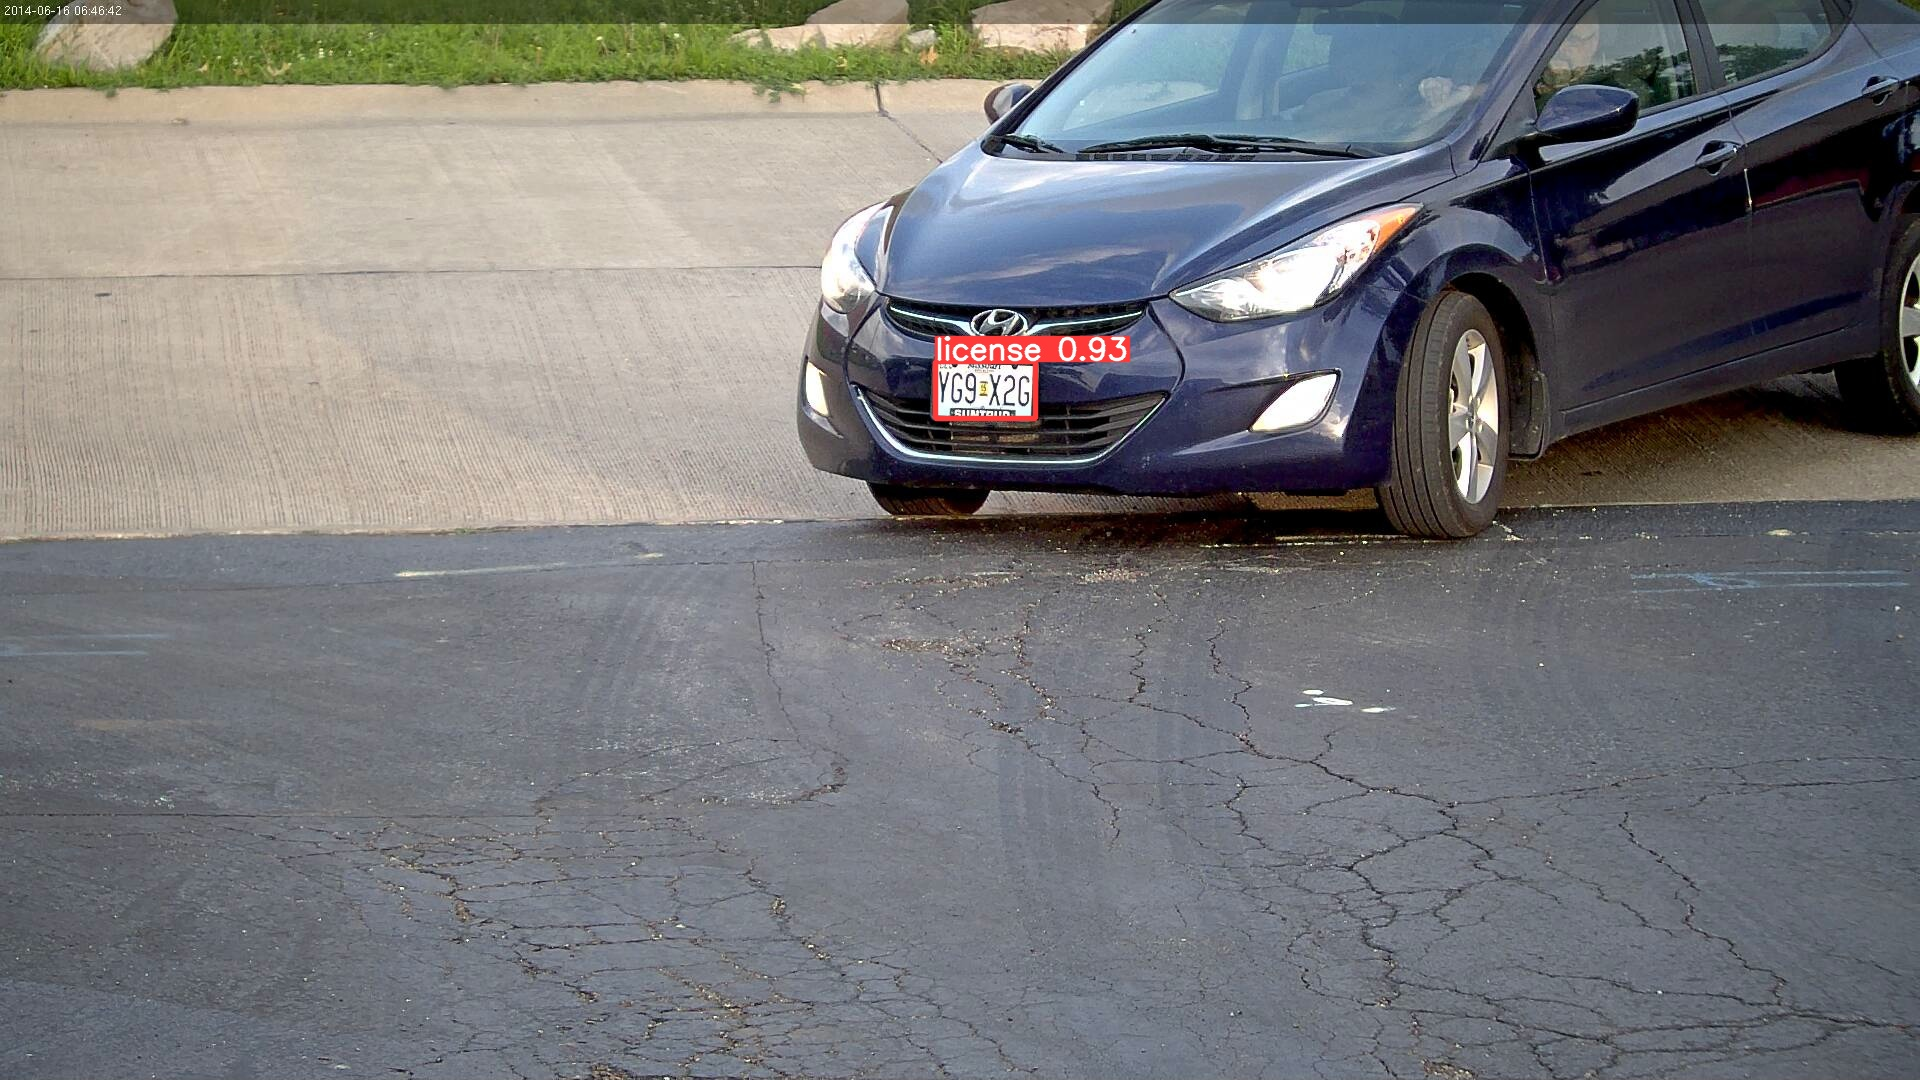

In [ ]:
Image('runs/detect/exp/0b86cecf-67d1-4fc0-87c9-b36b0ee228bb.jpg')

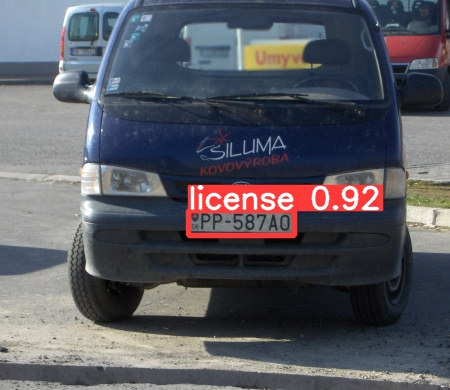

In [ ]:
Image('runs/detect/exp2/test_001.jpg')

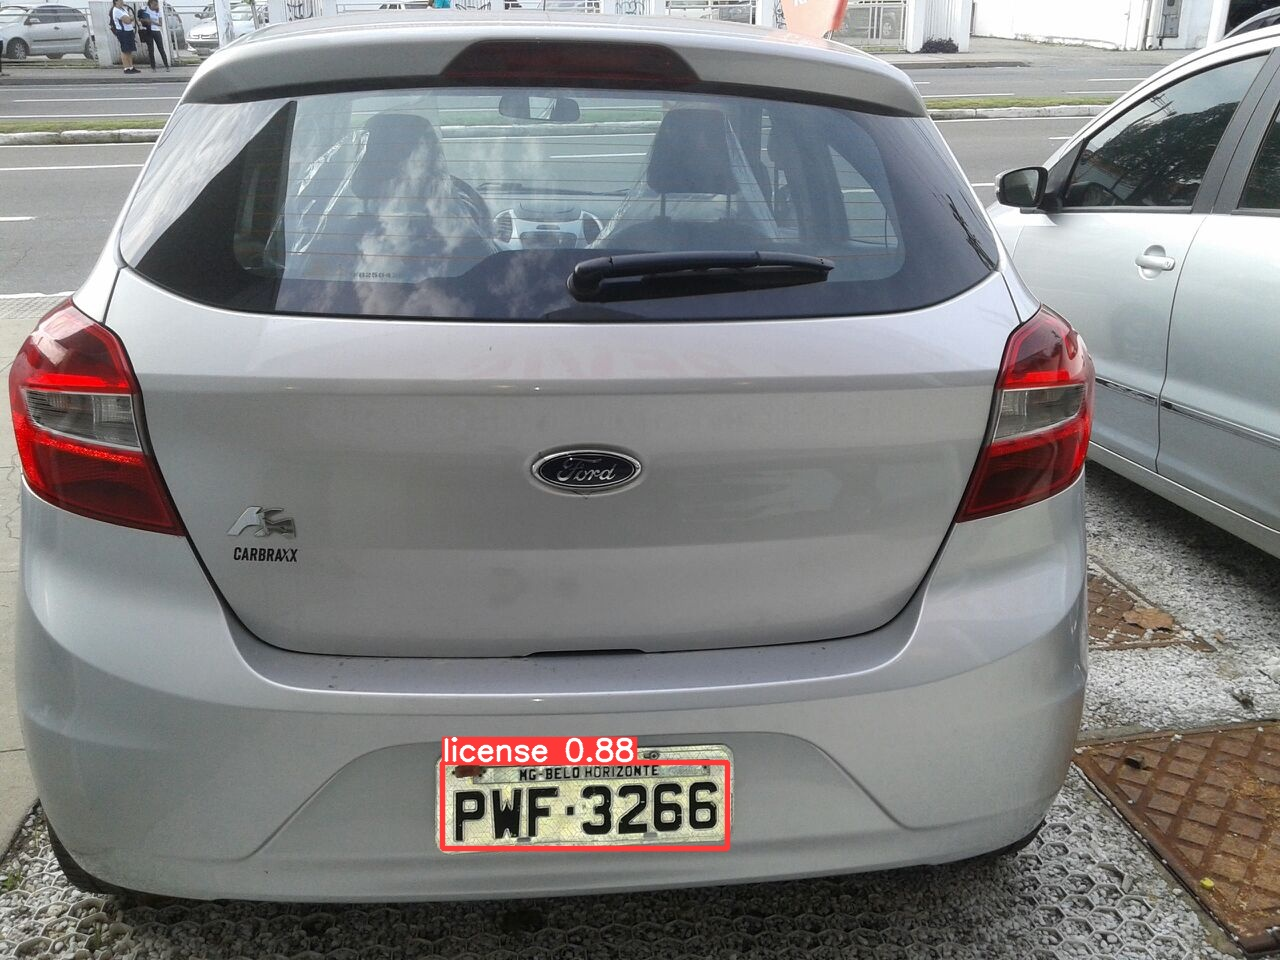

In [ ]:
Image('runs/detect/exp3/PWF3266.jpg')

# **OCR**

## **Get detected ALPR bounding box**

In [ ]:
def read_txt(filepath):
    f = open(filepath, 'r')
    lines = f.readlines()
    # read objects from each line of .txt
    objects = []
    for line in lines:
        line=line.rstrip()
        obj = [float(i) for i in line.split(' ')]
        objects.append(obj)
    return objects

## **OCR using PyTesseract**

In [ ]:
!pip install pytesseract

In [ ]:
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [ ]:
DETECT_PATH = '/content/drive/MyDrive/Colab_Notebooks/Colab_Notebooks/Output/yolov5/runs/detect/exp22/'
IMG_NAME    = 'test1'

In [ ]:
from IPython.display import Image

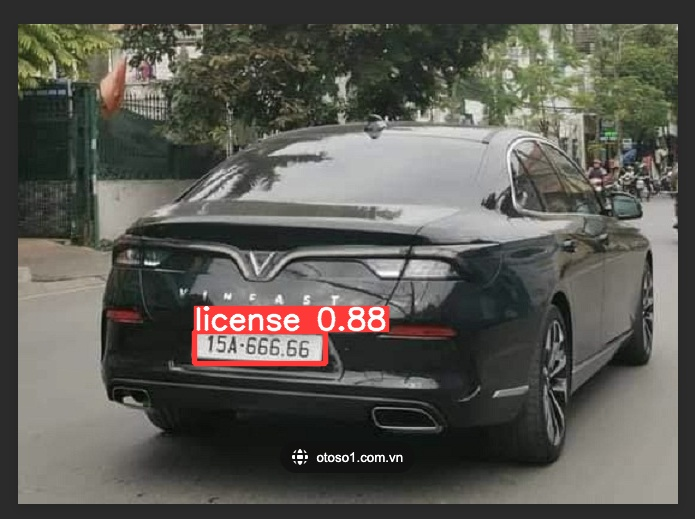

In [ ]:
Image(DETECT_PATH+IMG_NAME+'.jpg')

0.373381 0.668593 0.188489 0.061657
| 154-666.66 |



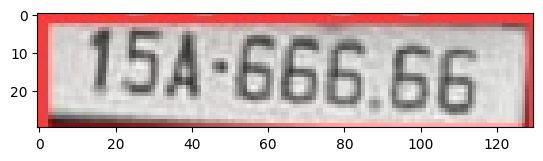

In [ ]:
from PIL import Image
img = Image.open(DETECT_PATH+IMG_NAME+'.jpg')
#Lấy kích thước ảnh
width, height = img.size

from IPython.display import Image
import pytesseract
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(DETECT_PATH+IMG_NAME+'.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

lics = read_txt(DETECT_PATH +'labels/'+IMG_NAME+'.txt')

for lic in lics:
    c, x, y, w, h = lic
    print(x,y,w,h) # center of the bounding box

    # Gỡ bỏ chuẩn hóa tọa độ và kích thước bounding box
    bounding_box_width = int(w * width)
    bounding_box_height = int(h * height)
    center_x = int(x * width)
    center_y = int(y * height)

    # Tính toán lại tọa độ của bounding box trên ảnh gốc
    x_min = center_x - bounding_box_width // 2
    x_max = center_x + bounding_box_width // 2
    y_min = center_y - bounding_box_height // 2
    y_max = center_y + bounding_box_height // 2

    img_alpr = img[y_min:y_max, x_min:x_max]
    plt.imshow(img_alpr)
    txt = pytesseract.image_to_string(img_alpr, config='--psm 9')
    print(txt)